In [34]:
library("openxlsx")
library("ggplot2")
library("tidyr")

In [35]:
df <- read.xlsx(
  xlsxFile = "ResiduosPerCapita.xlsx",
  sheet = 1,
  cols = c(1:3),
  rows = c(11:43),
)
names(df) <- c("country", "2004", "2018")
df

,country,2004,2018
,<chr>,<dbl>,<dbl>
1,UE27 (2020) - União Europeia 27 (desde 2020),5.2,5.2
2,DE - Alemanha,4.4,4.9
3,AT - Áustria,6.5,7.4
4,BE - Bélgica,5.1,5.9
5,BG - Bulgária,26.0,18.5
6,CY - Chipre,3.1,2.6
7,HR - Croácia,1.7,1.4
8,DK - Dinamarca,2.3,3.7
9,SK - Eslováquia,2.0,2.3


In [36]:
year_columns <- names(df)[c(2:length(names(df)))]
df_hue <- df %>%
  pivot_longer(all_of(year_columns), names_to = "year", values_to = "res_per_cap")

In [37]:
df_filtered = df_hue[df_hue$`country` %in% c("AT - Áustria", "DE - Alemanha", "PT - Portugal"), ]
df_filtered

country,year,res_per_cap
<chr>,<chr>,<dbl>
DE - Alemanha,2004,4.4
DE - Alemanha,2018,4.9
AT - Áustria,2004,6.5
AT - Áustria,2018,7.4
PT - Portugal,2004,2.8
PT - Portugal,2018,1.5


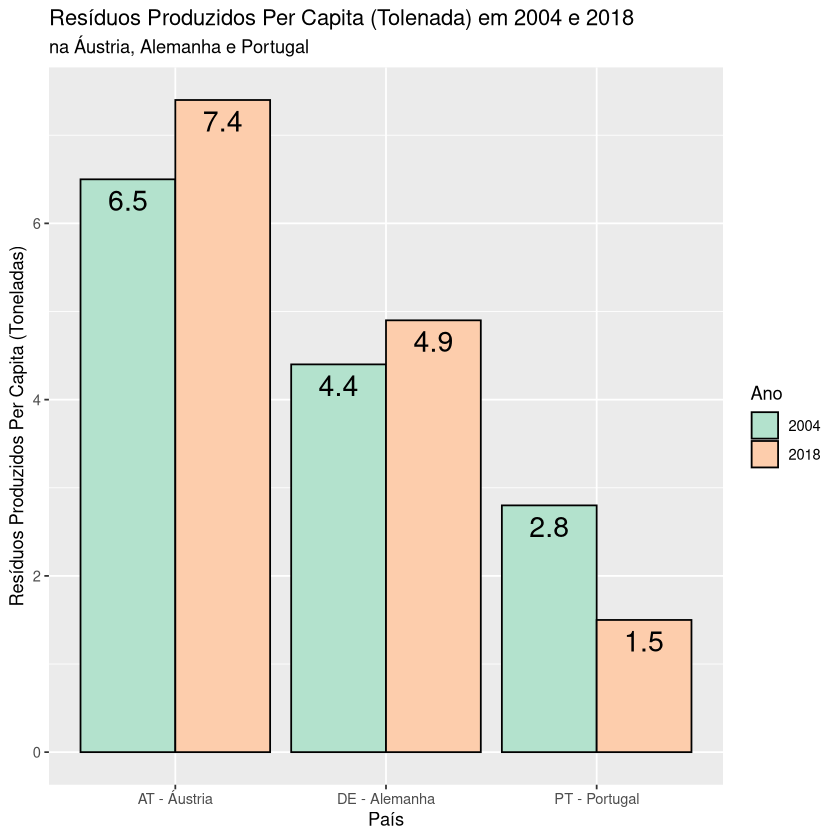

In [38]:
ggplot(df_filtered, aes(x = country, y = res_per_cap, fill = factor(year))) +
  geom_col(position = "dodge", colour = "black") +
  geom_text(
    aes(label = res_per_cap), vjust = 1.5,
    colour = "black", size = 6,
    position = position_dodge(.9)
  ) +
  scale_fill_brewer(palette = "Pastel2") +
  xlab("País") +
  ylab("Resíduos Produzidos Per Capita (Toneladas)") +
  labs(fill = "Ano", subtitle = "na Áustria, Alemanha e Portugal") +
  ggtitle("Resíduos Produzidos Per Capita (Tolenada) em 2004 e 2018")

Pelo diagrama obtido, podemos concluir que tanto na Áustria como na Alemanha houve um aumento dos resíduos produzidos
per capita entre 2004 e 2018. Por outro lado, em Portugal houve uma descida no mesmo período.
Entre países, observamos que existe uma maior produção de resíduos na Áustria, seguida a Alemanha e por fim Portugal.